In [90]:
import matplotlib.pyplot as plt
import torch

In [91]:
# Example from https://d2l.ai/chapter_optimization/momentum.html

# Try playing around with different coefficents

def loss_func(x1, x2):
    a1 = 0.1
    a2 = 2
    return (a1 * x1 ** 2) + (a2 * x2 ** 2)

In [92]:
extent = 4

x1list = torch.linspace(-extent, extent, 100)
x2list = torch.linspace(-extent, extent, 100)

x1grid, x2grid = torch.meshgrid(x1list, x2list)

loss_grid = loss_func(x1grid, x2grid)

x1grid, x2grid, loss_grid

(tensor([[-4.0000, -4.0000, -4.0000,  ..., -4.0000, -4.0000, -4.0000],
         [-3.9192, -3.9192, -3.9192,  ..., -3.9192, -3.9192, -3.9192],
         [-3.8384, -3.8384, -3.8384,  ..., -3.8384, -3.8384, -3.8384],
         ...,
         [ 3.8384,  3.8384,  3.8384,  ...,  3.8384,  3.8384,  3.8384],
         [ 3.9192,  3.9192,  3.9192,  ...,  3.9192,  3.9192,  3.9192],
         [ 4.0000,  4.0000,  4.0000,  ...,  4.0000,  4.0000,  4.0000]]),
 tensor([[-4.0000, -3.9192, -3.8384,  ...,  3.8384,  3.9192,  4.0000],
         [-4.0000, -3.9192, -3.8384,  ...,  3.8384,  3.9192,  4.0000],
         [-4.0000, -3.9192, -3.8384,  ...,  3.8384,  3.9192,  4.0000],
         ...,
         [-4.0000, -3.9192, -3.8384,  ...,  3.8384,  3.9192,  4.0000],
         [-4.0000, -3.9192, -3.8384,  ...,  3.8384,  3.9192,  4.0000],
         [-4.0000, -3.9192, -3.8384,  ...,  3.8384,  3.9192,  4.0000]]),
 tensor([[33.6000, 32.3201, 31.0664,  ..., 31.0664, 32.3201, 33.6000],
         [33.5360, 32.2561, 31.0024,  ..., 31

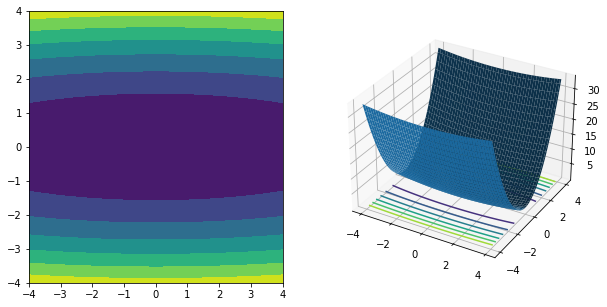

In [93]:
fig = plt.figure(figsize=(10, 5))

ax = fig.add_subplot(1, 2, 1)
ax.contourf(x1grid, x2grid, loss_grid)

ax = fig.add_subplot(1, 2, 2, projection="3d")
ax.plot_surface(x1grid.numpy(), x2grid.numpy(), loss_grid.numpy())
ax.contour(x1grid, x2grid, loss_grid, zdir='z', offset=0);

In [94]:
parameters = torch.rand(2) * 8 - 4
parameters

tensor([3.9268, 3.7113])

# Gradient Descent

$$
θ_{t+1} = θ_t - η \nabla L(\hat y, y)
$$

In [128]:
# Mini-batch SGD

parameters = torch.tensor([3.0, 3.0], requires_grad=True)

# Try 0.1, 0.4, 0.5, and 0.6
learning_rate = 0.4
num_epochs = 10

phistory = [parameters.detach().clone()]
lhistory = [0]

for epoch in range(num_epochs):

    # Compute loss/cost and gradients
    parameters.grad = None
    loss = loss_func(parameters[0], parameters[1])
    loss.backward()
    
    print(loss.item())
    
    # Update parameters
    with torch.no_grad():
        parameters -= learning_rate * parameters.grad
    
    phistory.append(parameters.detach().clone())
    lhistory.append(loss.item())

18.899999618530273
18.729000091552734
18.590490341186523
18.478296279907227
18.387420654296875
18.313810348510742
18.254186630249023
18.205890655517578
18.166770935058594
18.135086059570312


In [129]:
phistory

[tensor([3., 3.]),
 tensor([ 2.7000, -3.0000]),
 tensor([2.4300, 3.0000]),
 tensor([ 2.1870, -3.0000]),
 tensor([1.9683, 3.0000]),
 tensor([ 1.7715, -3.0000]),
 tensor([1.5943, 3.0000]),
 tensor([ 1.4349, -3.0000]),
 tensor([1.2914, 3.0000]),
 tensor([ 1.1623, -3.0000]),
 tensor([1.0460, 3.0000])]

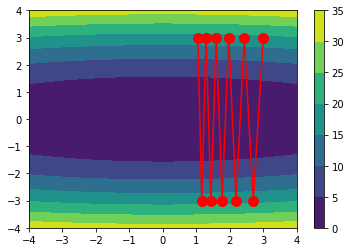

In [130]:
loss_grid = loss_func(x1grid, x2grid)

cplot = plt.contourf(x1grid, x2grid, loss_grid)
plt.colorbar(cplot)

x1 = [p[0].item() for p in phistory]
x2 = [p[1].item() for p in phistory]

plt.plot(x1, x2, color='red', marker='o', markersize=10);

# Gradient Descent with Momentum

Initial condition:
$$
v_0 = 0
$$

General case:

\begin{align}
v_{t+1} &= β v_t + (1 - β) \nabla L(\hat y, y) \\
θ_{t+1} &= θ_t - η v_{t+1}
\end{align}

In [131]:
# Mini-batch SGD with momentum

parameters = torch.tensor([3.0, 3.0], requires_grad=True)
momentum = torch.zeros_like(parameters)

# Hyperparameters
learning_rate = 0.8
num_epochs = 10
beta = 0.9

phistory_mo = [parameters.detach().clone()]
lhistory_mo = [0]

for epoch in range(num_epochs):

    # Compute loss/cost and gradients
    parameters.grad = None
    loss = loss_func(parameters[0], parameters[1])
    loss.backward()
    
    print(loss.item())
    
    # Update parameters
    with torch.no_grad():
        
        # Compute momentum
        momentum = beta * momentum + (1 - beta) * parameters.grad
        parameters -= learning_rate * momentum
    
    phistory_mo.append(parameters.detach().clone())
    lhistory_mo.append(loss.item())

18.899999618530273
9.194629669189453
1.3663334846496582
2.7852420806884766
9.197443008422852
11.667389869689941
7.41556453704834
1.741990089416504
0.5869318246841431
3.7918736934661865


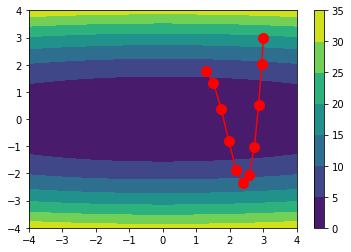

In [132]:
loss_grid = loss_func(x1grid, x2grid)

cplot = plt.contourf(x1grid, x2grid, loss_grid)
plt.colorbar(cplot)

x1 = [p[0].item() for p in phistory_mo]
x2 = [p[1].item() for p in phistory_mo]

plt.plot(x1, x2, color='red', marker='o', markersize=10);

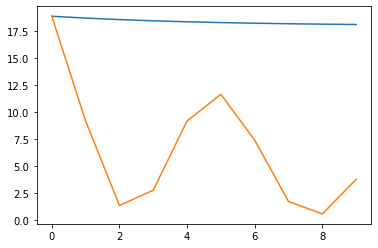

In [133]:
plt.plot(lhistory[1:])
plt.plot(lhistory_mo[1:]);

# Exponential Averaging

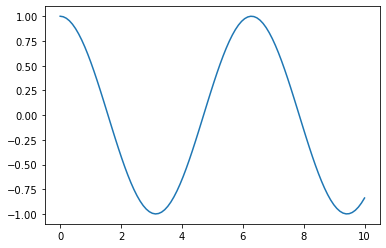

In [134]:
x = torch.linspace(0, 10, 100)
y = torch.cos(x)

plt.plot(x, y);

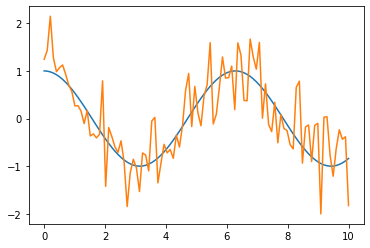

In [101]:
ynoisy = torch.cos(x) + torch.randn_like(x) * 0.5

plt.plot(x, y);
plt.plot(x, ynoisy);

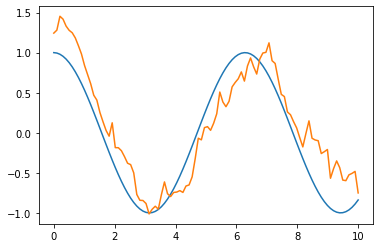

In [102]:
# Without correction (we are doubling the first value!)

beta = 0.8

ysmooth = [ynoisy[0]]
for yval in ynoisy[1:]:
    ysmooth.append(beta * ysmooth[-1] + (1 - beta) * yval)

plt.plot(x, y);
plt.plot(x, ysmooth);